# Data Exploration

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use("seaborn-v0_8")

DATA_FOLDER = "data/"

---
---

### Dataset Information
- Two different datasets are provided:
    - *'Properties'* includes the different chemical/physical properties of the materials
    - *'Formula'* includes the chemical formula of each material (one column for each chemical element)
- Each row describes a single superconductor
- The Properties features are 8 basic chemical properties (absolute value, average, weighted average, and so on):
    - atomic mass
    - ionization energy
    - atomic radius
    - density
    - electron affinity energy
    - specific heat of melting
    - thermal conductivity
    - valence

### Target feature
- The target is the critical temperature of the superconductor (last column)
- The values distribution is not uniform and has its peak near the value of 0 (see plot below)

### Other Features
- All features are numerical, except the formula ("*material*") written in plain text, which will be removed because useless
- No null values
- No strictly-duplicated rows are present. Some lines are the same except for the formula. Since the documentation says that each row is a single superconductor, no duplicated rows are removed
- There are present many highly correlated features among the Properties dataset. There will be tests with and without these features (see correlation matrix below)
    - Mainly the high correlation is between the different metrics of the same property, e.g. 'mean_\*' and 'wtd_mean_\*', or 'entropy_\*' and 'wtd_entropy_\*
- The feature values belong to different ranges and they present different value distributions, thus scaling techniques will be tried (see plots matrix below)

---

In [7]:
print("Shapes of Properties df: ", pd.read_csv(DATA_FOLDER + "train.csv").shape)
print("Shapes of Formula df: ", pd.read_csv(DATA_FOLDER + "formula_train.csv").shape)
df = pd.concat(
    [
        pd.read_csv(DATA_FOLDER + "formula_train.csv").drop(columns=["critical_temp"]),
        pd.read_csv(DATA_FOLDER + "train.csv"),
    ],
    axis=1,
)
print("Shapes of Properties+Formula df: ", df.shape)

Shapes of Properties df:  (17010, 82)
Shapes of Formula df:  (17010, 88)
Shapes of Properties+Formula df:  (17010, 169)


In [8]:
display(df.head(5))
df.info()
display(df.describe())

,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Columns: 169 entries, H to critical_temp
dtypes: float64(156), int64(12), object(1)
memory usage: 21.9+ MB


,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,17010.000000,17010.0,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,0.018447,0.0,0.011884,0.035189,0.141945,0.376868,0.012462,3.010023,0.015318,0.0,...,3.151430,3.055206,3.054358,1.295344,1.052631,2.042034,1.482988,0.839731,0.673590,34.502993
std,0.287419,0.0,0.125699,0.861767,1.107689,4.357716,0.123290,3.796711,0.136147,0.0,...,1.192035,1.045869,1.175579,0.393231,0.380725,1.244305,0.980906,0.485728,0.454975,34.334793
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.117647,2.245649,2.091629,1.060857,0.779166,1.000000,0.920000,0.451754,0.307467,5.330000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,2.605455,2.615321,2.429201,1.368922,1.168512,2.000000,1.062857,0.800000,0.500000,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,4.019566,3.722419,3.914868,1.589027,1.331531,3.000000,1.912000,1.200000,1.020735,63.000000
max,14.000000,0.0,2.600000,40.000000,105.000000,120.000000,5.000000,66.000000,4.000000,0.0,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


---
### Plot Target feature

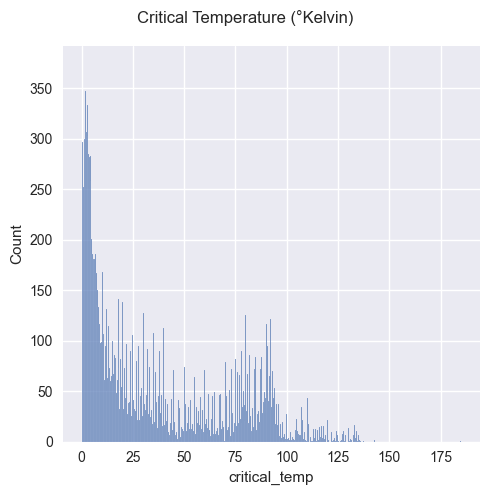

In [12]:
sns.displot(df["critical_temp"], bins=500).figure.suptitle("Critical Temperature (°Kelvin)")
plt.tight_layout()
plt.show()

---
### Correlation matrix of only the Properties features

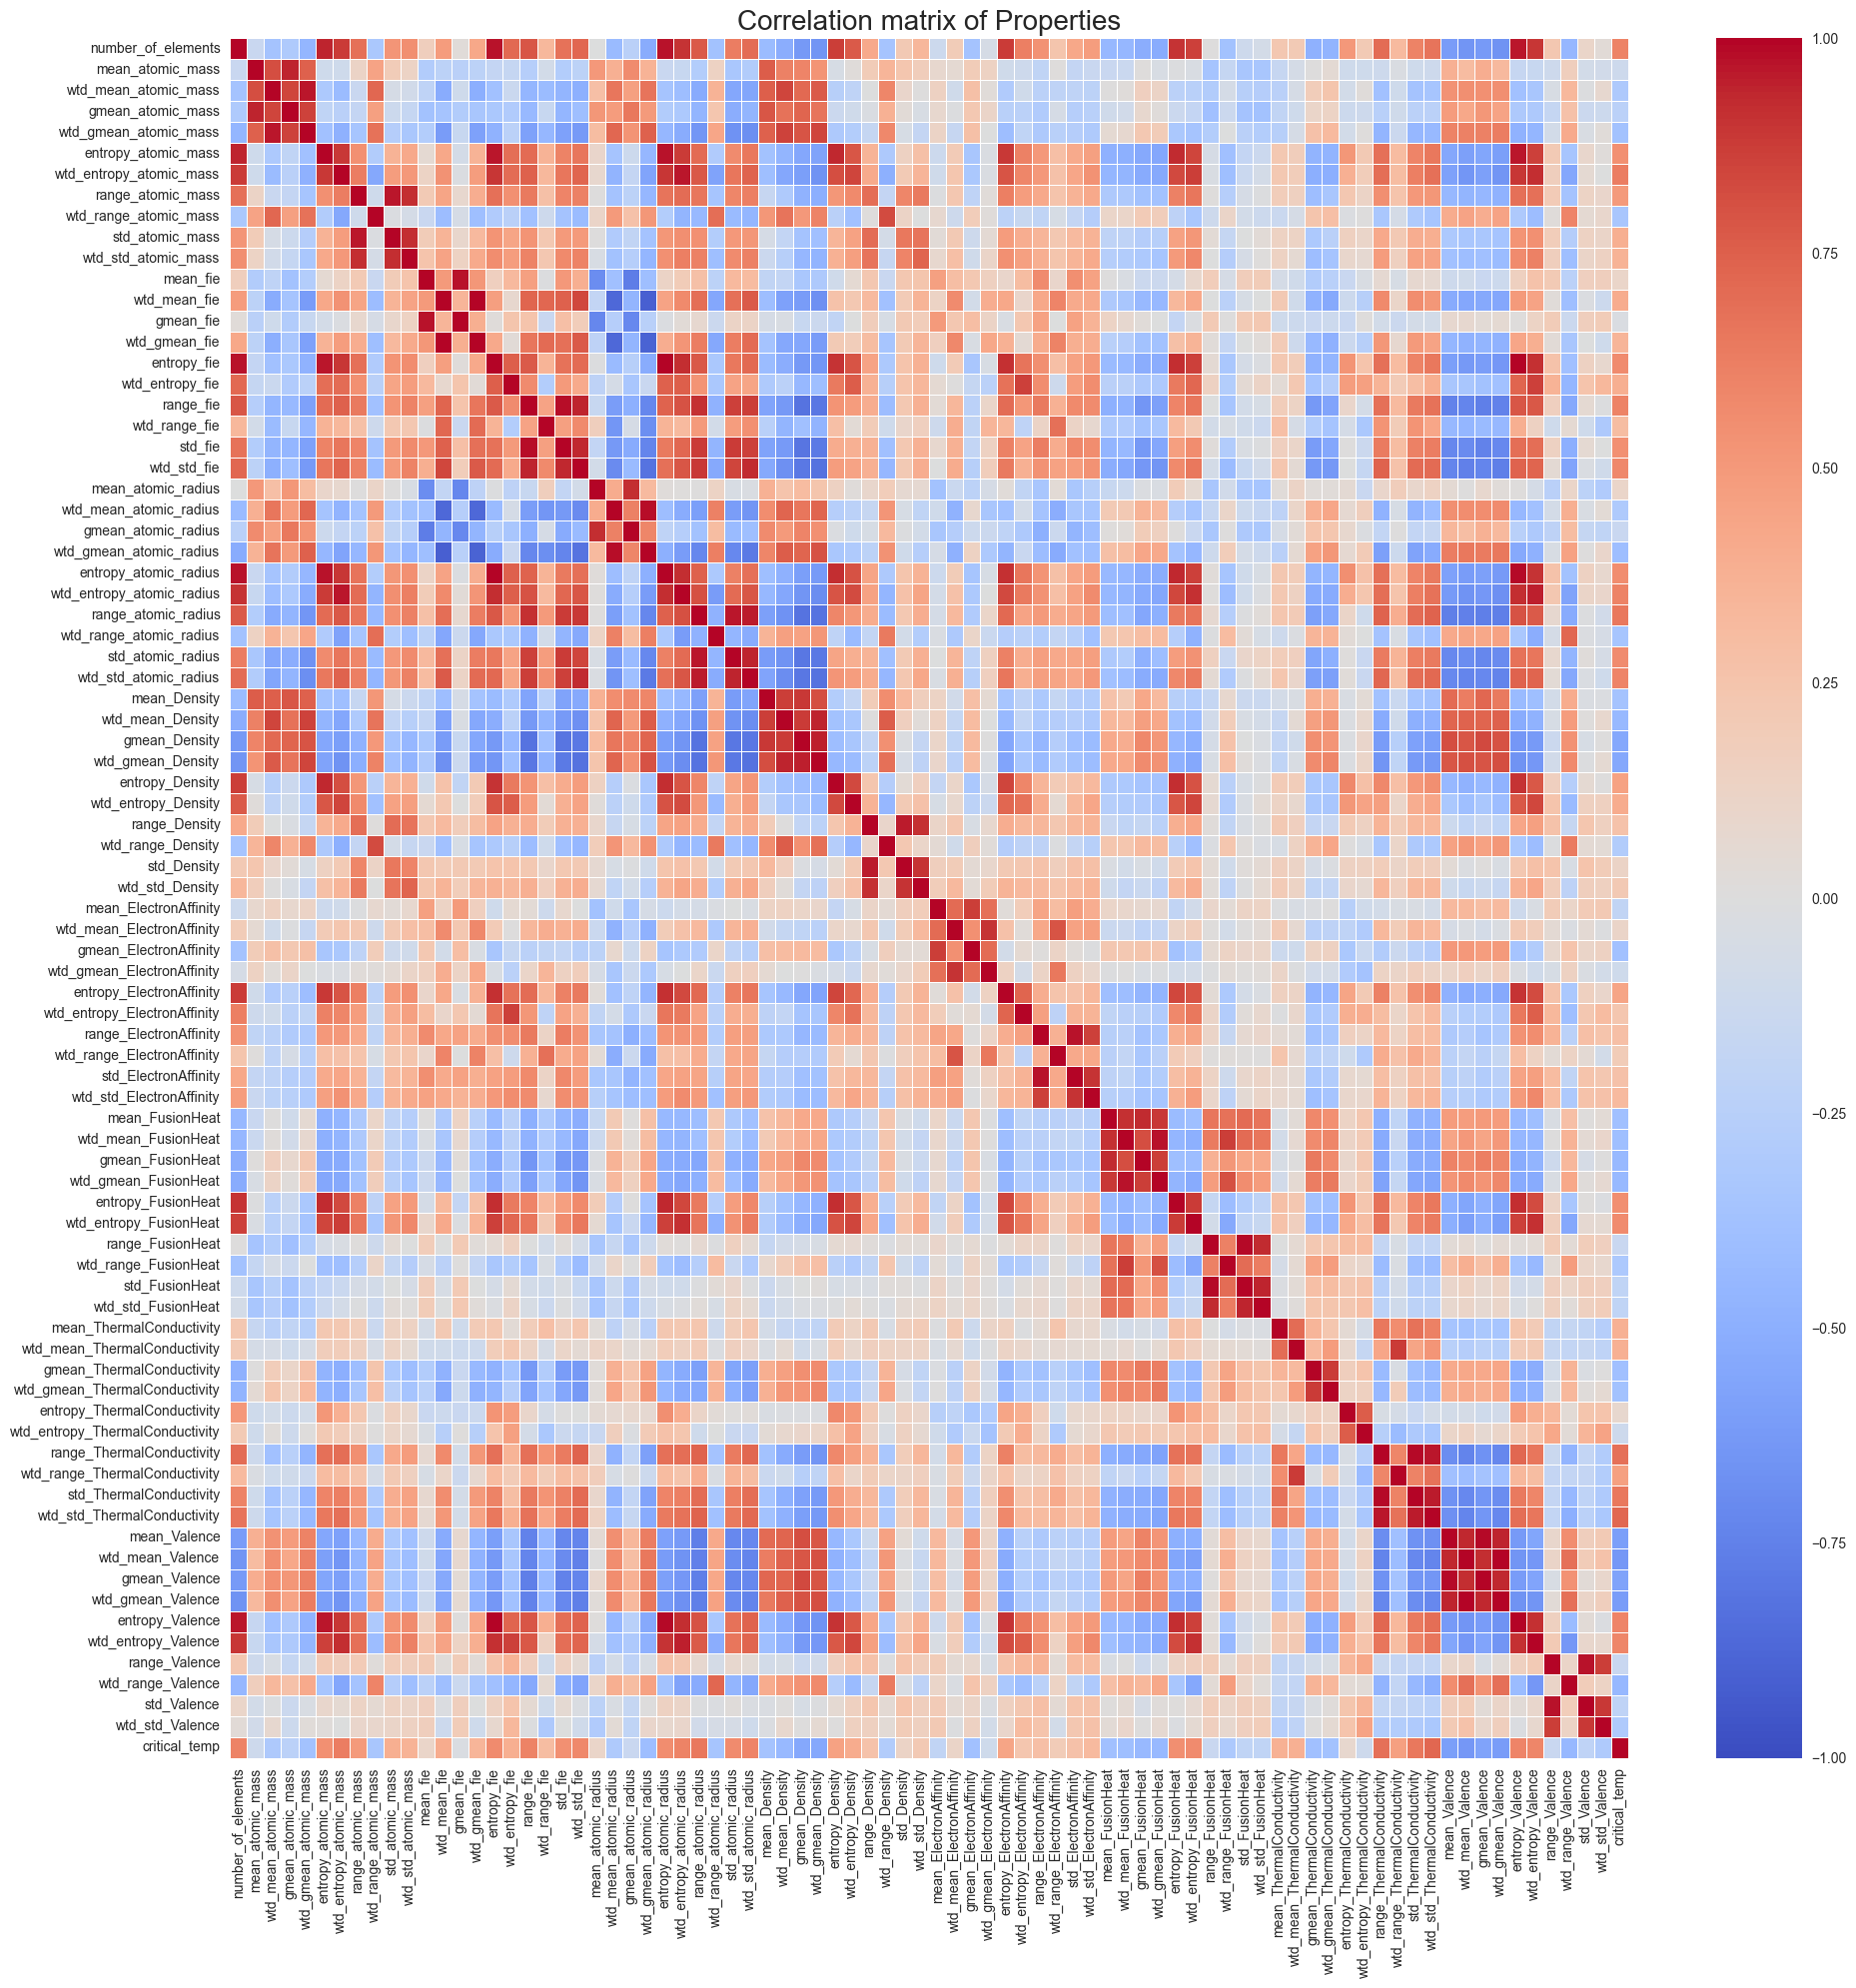

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df.drop(columns="material").iloc[:, 86:].corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    vmin=-1,
    vmax=1,
)
plt.title("Correlation matrix of Properties", fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

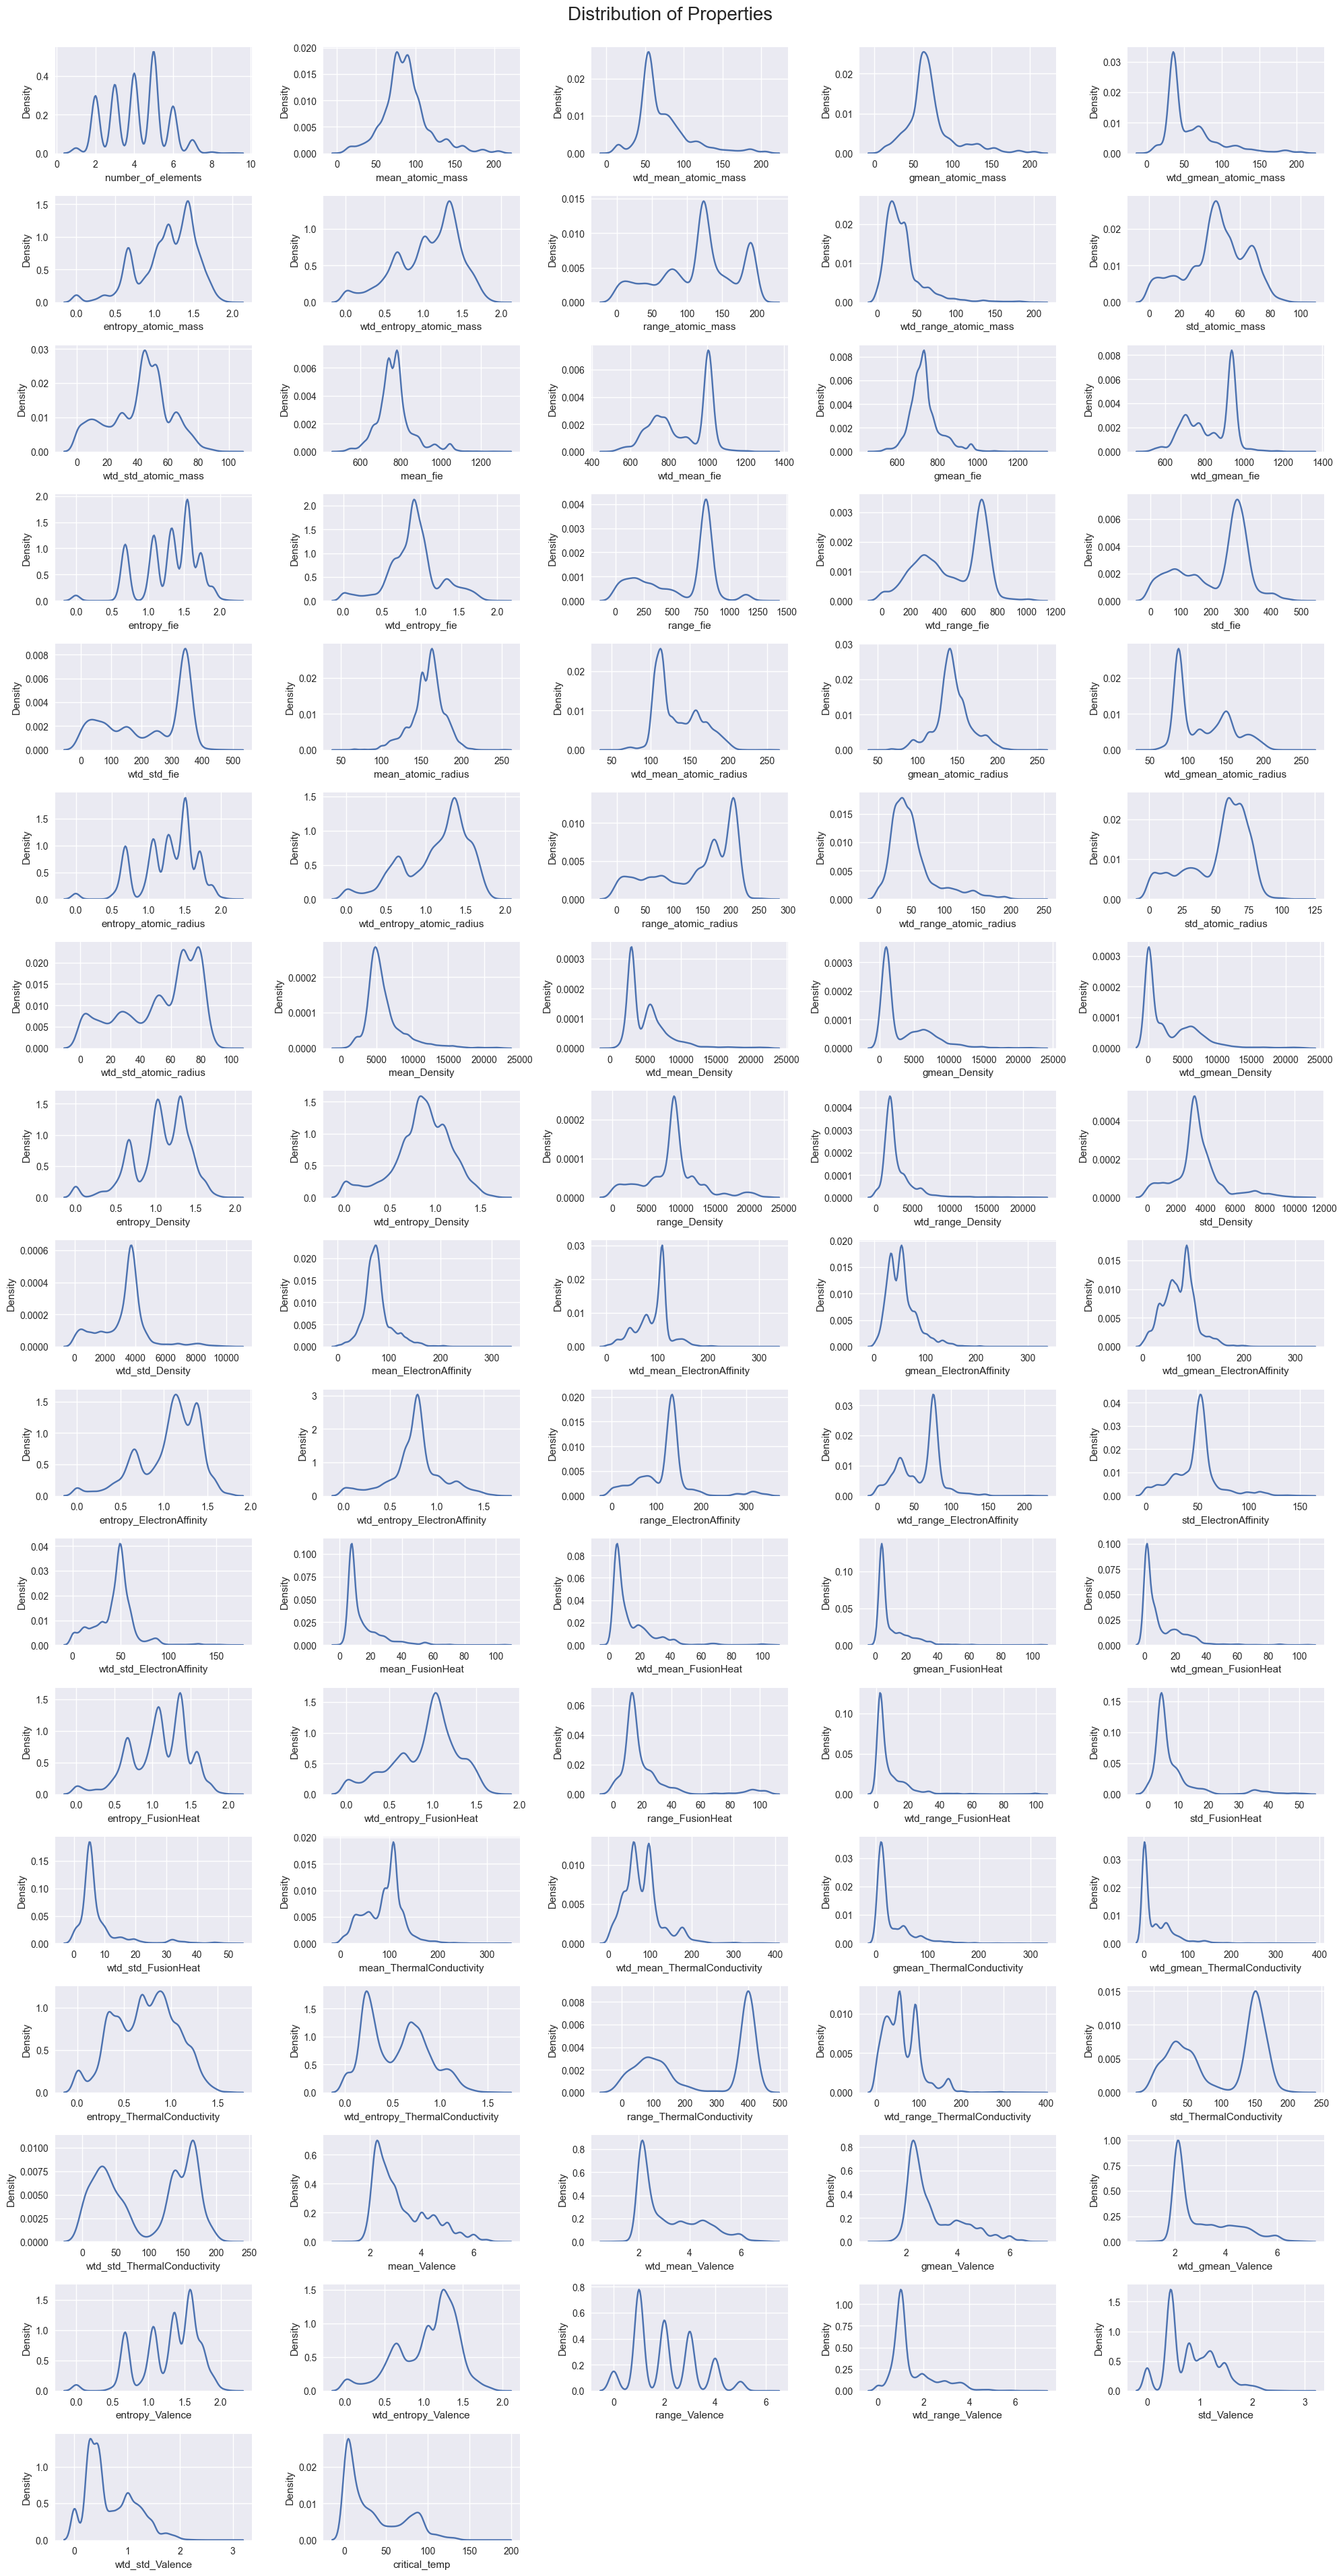

In [11]:
# Distribution of Properties
pos = 1
fig = plt.figure(figsize=(20, 40))
fig.suptitle("Distribution of Properties", y=1, fontsize=20)

for col in df.drop(columns="material").columns[86:]:
    plt.subplot(18, 5, pos)
    plt.xlabel(col)
    sns.kdeplot(df[col])
    pos = pos + 1

plt.tight_layout()
plt.show()